https://arxiv.org/pdf/1411.4038.pdf

In [2]:
import os

import numpy as np
from numpy import random as rng
from PIL import Image

import torch
import torchvision

In [3]:
# from torchvision.models.segmentation import fcn_resnet50
# model = fcn_resnet50(pretrained=True)

from torchvision.models.segmentation import fcn_resnet101
model = fcn_resnet101(pretrained=True)
model

FCN(
  (backbone): IntermediateLayerGetter(
    (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu): ReLU(inplace=True)
    (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (layer1): Sequential(
      (0): Bottleneck(
        (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (downsample): Sequenti

In [4]:
# model

In [5]:
data_folder = '../data/pascal/VOC/test/VOCdevkit/VOC2007'
img_folder = os.path.join(data_folder,'JPEGImages')
files = os.listdir(img_folder)

In [6]:
class_name = ['background','aeroplane','bicycle','bird','boat',
           'bottle','bus','car','cat','chair','cow','diningtable',
           'dog','horse','motorbike','person','potted plant',
           'sheep','sofa','train','tv/monitor']

---

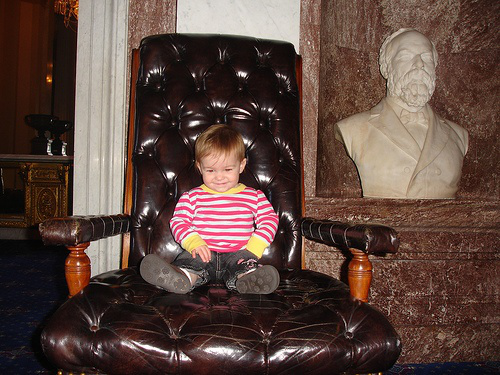

In [17]:
f = rng.choice(files)
img = Image.open(os.path.join(img_folder,f))
img

In [18]:
import torchvision.transforms as transforms

img_transforms = transforms.Compose([ 
            transforms.ToTensor(),
            # transforms.Resize(size=(224,224)),
            transforms.Normalize(mean=[0.485, 0.456, 0.406],std=[0.229, 0.224, 0.225]),
        ])

# img_transforms(img).unsqueeze(0).shape

In [19]:
# x = img2tensor(img)
x = img_transforms(img).unsqueeze(dim=0)
with torch.no_grad():
    o = model(x)

mask = torch.squeeze(o['out'],dim=0).detach().numpy()
mask_max_idx = np.argmax(mask,axis=0)

n_classes = 21

im_mask = [ (mask_max_idx==c).astype(np.uint8) for c in range(n_classes) ]

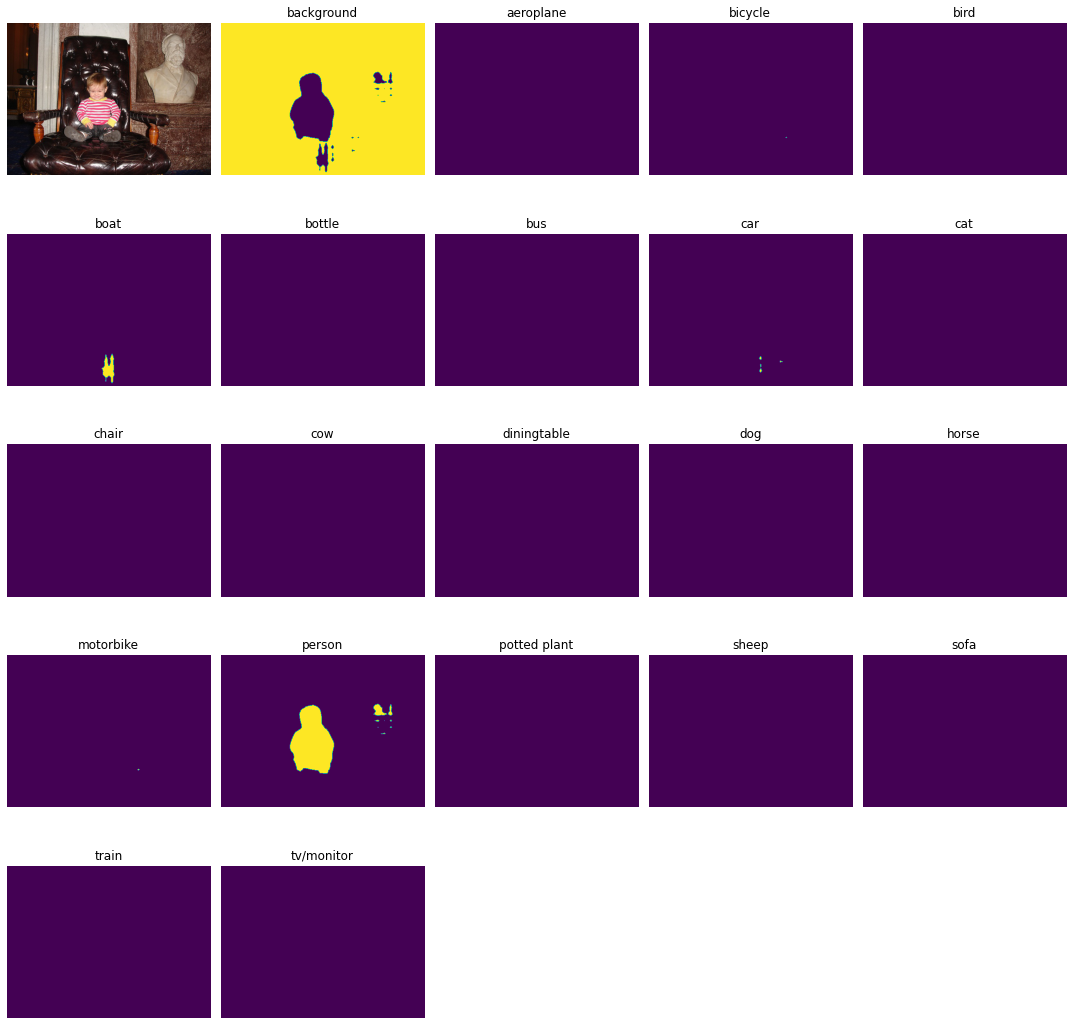

In [20]:
import matplotlib.pyplot as plt

col = 5

fig = plt.figure(figsize=(15,15))
# fig = plt.figure(figsize=(2*col,2*(n_classes//col+1)))
plt.subplot(n_classes//col+1,col,1)
plt.axis(False)
plt.imshow(img)
for i,n in enumerate(range(n_classes),1):
    plt.subplot(n_classes//col+1,col,i+1)
    plt.title(class_name[n])
    plt.axis(False)
    plt.imshow(im_mask[n])
fig.tight_layout()    

---

In [ ]:
# score_bound = 9.7

# im_mask_max = (np.max(mask,axis=0)>score_bound).astype(np.uint8)
# im_mask = [ (mask_max_idx==c).astype(np.uint8)*im_mask_max for c in range(n_classes) ]

In [ ]:
# import matplotlib.pyplot as plt

# col = 5

# # fig = plt.figure(figsize=(2*col,2*(n_classes//col+1)))
# fig = plt.figure(figsize=(25,30))
# plt.subplot(n_classes//col+1,col,1)
# plt.axis(False)
# plt.imshow(img)
# for i,n in enumerate(range(n_classes),1):
#     plt.subplot(n_classes//col+1,col,i+1)
#     plt.title(n)
#     plt.axis(False)
#     plt.imshow(im_mask[n])
# fig.tight_layout()    

---

In [ ]:
# def img2tensor(im):
#     x = np.array(im.convert('RGB'))
#     x_mx,x_mn = x.max(axis=(0,1),keepdims=1), x.min(axis=(0,1),keepdims=1) 
#     x = ((x-x_mn)/(x_mx-x_mn)).astype(np.float32)
#     x = np.transpose( x, axes=(2,0,1) ) 
#     return torch.tensor(x[np.newaxis,:])

In [ ]:
# def img2tensor(im):
#     x = np.array(im.convert('RGB')).astype(np.float32)
#     x = np.transpose( x, axes=(2,0,1) ) 
#     return torch.tensor(x[np.newaxis,:])

In [ ]:
# import matplotlib.pyplot as plt

# col = 2
# n_class = 15

# fig = plt.figure(figsize=(15,10))
# plt.subplot(1,2,1)
# plt.axis(False)
# plt.imshow(img)

# plt.subplot(1,2,2)
# plt.axis(False)
# plt.imshow(im_mask[n_class])  

----

In [ ]:
# import matplotlib.pyplot as plt

# plt.imshow(im_mask[11])

In [ ]:
# from scipy.sparse import csr_matrix

# csr_matrix(mask_max_idx)

In [ ]:
# np.ravel?

In [ ]:
# mask[:,1,1]

In [ ]:
# np.sign?

In [ ]:
# np.argmax(mask,axis=0)

In [ ]:
# def tensor2img(x):
#     x_mx,x_mn = x.max(axis=(1,2),keepdims=1), x.min(axis=(1,2),keepdims=1) 
#     im = (((x-x_mn)/(x_mx-x_mn))*255.).astype(np.uint8)
#     return im

# mask_im = tensor2img(mask)




#     [ m for m in range   ]
#     x = np.array(im.convert('RGB'))
#     x_mx,x_mn = x.max(axis=(0,1),keepdims=1), x.min(axis=(0,1),keepdims=1) 
#     x = ((x-x_mn)/(x_mx-x_mn)).astype(np.float32)
#     x = np.transpose( x, axes=(2,0,1) ) 
#     return torch.tensor(x[np.newaxis,:])

In [ ]:
# import matplotlib.pyplot as plt

# plt.imshow(mask)

In [ ]:
# mask[0,:]

---

In [ ]:
# torch.randn(1,3,224,224)

In [ ]:
# dict( model.named_parameters() )

In [ ]:
# from torchsummary import summary

# summary(model, (3,224,224), device='cpu')

In [ ]:
# from torchviz import make_dot

# # model(torch.randn(1,3,224,224))
# #with torch.no_grad():
# graph = make_dot(y,) # params=dict(model.named_parameters()))
# graph

In [ ]:
# import hiddenlayer as hl

# transforms = [ hl.transforms.Prune('Constant') ] # Removes Constant nodes from graph.
# graph = hl.build_graph(model , torch.randn(1,3,224,224) ) #, transforms=transforms)
# graph.theme = hl.graph.THEMES['blue'].copy()
# graph

In [ ]:
# import torchvision.transforms as transforms

In [ ]:
# img_transforms = transforms.Compose([ 
#             transforms.ToTensor(),
#             transforms.Resize(size=(224,224)),
#             transforms.Normalize(mean=[0.485, 0.456, 0.406],std=[0.229, 0.224, 0.225]),
#         ])

In [ ]:
# img_transforms(X)